# Introduction

talk about classifiction and how it will help you

# Decision Tree Classifier 

talk about how decision tree classifier works and how is it different from regresor a

In [48]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



talk about what you're supposed to do 

In [49]:
stackeddf= pd.read_csv("../data/stackeddf.csv")

stackeddf.head(5)

,year,adj_NNI_g,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,ex_imp_growth,ex_debt_shocks,fdi_net_outflows,gdp_growth,short_term_debt_tot_reserves,lending_interest_rate,life_exp_birth,expense_gdp,military expenditure,labels
0,-1.647859,1.230366,0.270892,-0.277537,-0.052004,0.419580,-1.270470,-0.842531,1.595002,-0.032164,-0.845342,-0.112698,-0.121526,-0.167829,High Growth
1,-1.572340,-1.216110,0.313510,-0.277537,0.103127,-0.481153,-1.204634,-0.842808,1.304262,0.403253,-0.845342,-0.110878,-0.141348,-0.151690,High Growth
2,-1.496821,-0.510146,0.367195,-0.277537,0.049534,0.536099,-0.969857,-0.842942,0.295912,0.851964,-0.845342,-0.109081,-0.105898,-0.102821,Moderate Growth
3,-1.421301,1.160350,0.316780,-0.277537,0.046547,-0.495731,-0.889487,-0.842495,1.815392,1.403674,-0.845342,-0.107310,-0.098738,-0.109603,Very High Growth
4,-1.345782,-0.472199,0.362786,-0.277537,0.058430,0.726138,-0.708319,-0.842596,0.433390,1.517825,-0.845342,-0.105584,-0.034063,-0.080748,Moderate Growth


In [50]:
X= stackeddf.drop(['year'], axis=1)
X= X.drop(['labels'], axis=1)
Y= stackeddf['labels']

print(X.head(3))
print(Y.head(3))

   adj_NNI_g  adj_savings_fix_cap_GNI  adj_savings_edu_GNI  adj_NNS_GNI  \
0   1.230366                 0.270892            -0.277537    -0.052004   
1  -1.216110                 0.313510            -0.277537     0.103127   
2  -0.510146                 0.367195            -0.277537     0.049534   

   ex_imp_growth  ex_debt_shocks  fdi_net_outflows  gdp_growth  \
0       0.419580       -1.270470         -0.842531    1.595002   
1      -0.481153       -1.204634         -0.842808    1.304262   
2       0.536099       -0.969857         -0.842942    0.295912   

   short_term_debt_tot_reserves  lending_interest_rate  life_exp_birth  \
0                     -0.032164              -0.845342       -0.112698   
1                      0.403253              -0.845342       -0.110878   
2                      0.851964              -0.845342       -0.109081   

   expense_gdp  military expenditure  
0    -0.121526             -0.167829  
1    -0.141348             -0.151690  
2    -0.105898      

In [51]:
print(Y)

0           High Growth
1           High Growth
2       Moderate Growth
3      Very High Growth
4       Moderate Growth
             ...       
190          Low Growth
191          Low Growth
192          Low Growth
193    Very High Growth
194     Moderate Growth
Name: labels, Length: 195, dtype: object


In [52]:
# the class distribution of the labels 

# Compute the distribution of class labels
distribution = stackeddf['labels'].value_counts()

# Print the distribution
print("Class Distribution:")
print(distribution)

Class Distribution:
labels
Low Growth          88
Moderate Growth     72
Very High Growth    18
High Growth         17
Name: count, dtype: int64


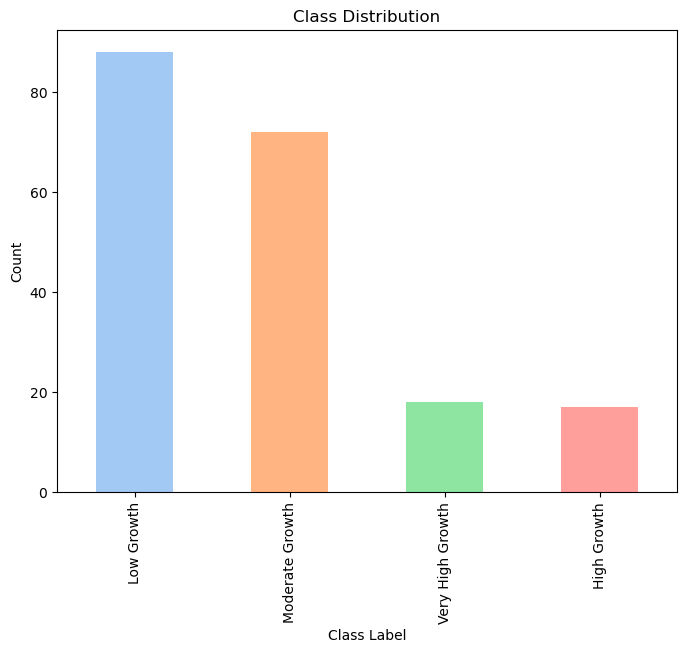

In [53]:
colors = sns.color_palette('pastel', len(distribution))
plt.figure(figsize=(8, 6))
distribution.plot(kind='bar', color=colors)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

## Baseline Decision Tree Classifier

In [54]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a base decision tree classifier
base_dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the base model on the training set
base_dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
base_val_pred = base_dt_classifier.predict(X_val)

# Evaluate the performance of the base model on the validation set
base_val_accuracy = accuracy_score(y_val, base_val_pred)
print(f"Base Decision Tree Accuracy on Validation Set: {base_val_accuracy:.2f}")

# Print classification report for the base model on the validation set
print("Classification Report for Base Decision Tree on Validation Set:")
print(classification_report(y_val, base_val_pred))

Base Decision Tree Accuracy on Validation Set: 0.33
Classification Report for Base Decision Tree on Validation Set:
                  precision    recall  f1-score   support

     High Growth       0.00      0.00      0.00         4
      Low Growth       0.45      0.56      0.50        18
 Moderate Growth       0.21      0.27      0.24        11
Very High Growth       0.00      0.00      0.00         6

        accuracy                           0.33        39
       macro avg       0.17      0.21      0.18        39
    weighted avg       0.27      0.33      0.30        39



/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Accuracy on the Validation Set: The accuracy is the ratio of correctly predicted instances to the total number of instances. In this case, the base decision tree model achieved an accuracy of 0.33, which means that it correctly predicted the class labels for approximately 33% of the instances in the validation set.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. Precision is relevant when the cost of false positives is high. For each class, precision is calculated. For example, for the "Low Growth" class, the precision is 0.45, indicating that 45% of instances predicted as "Low Growth" were indeed "Low Growth."

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It is also called True Positive Rate or Sensitivity. For example, for the "Low Growth" class, the recall is 0.56, indicating that the model correctly identified 56% of the actual instances of "Low Growth."

F1-Score: The F1-score is the weighted average of precision and recall. It is a metric that considers both false positives and false negatives. It is a good way to show that a classifer has a good value for both precision and recall. It ranges from 0 to 1, where a higher value indicates better performance.

In summary, the base decision tree model, as evaluated on the validation set, has limitations in accurately predicting the different classes. The low precision and recall values indicate that there is room for improvement, and hyperparameter tuning or other model adjustments may be necessary to enhance its performance.

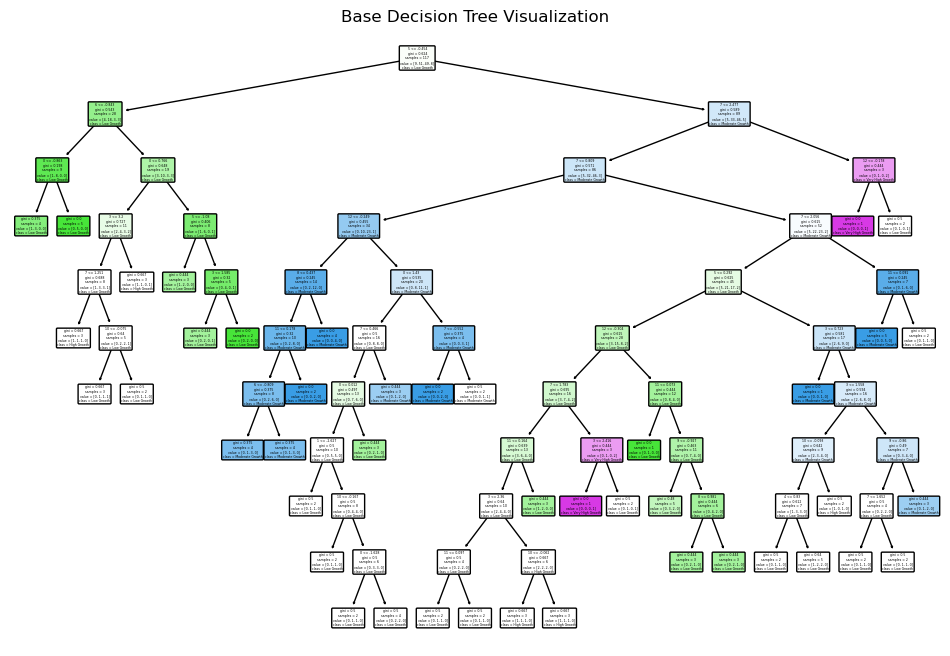

In [55]:
plt.figure(figsize=(12, 8))
plot_tree(base_dt_classifier, filled=True, feature_names=[str(i) for i in range(X.shape[1])], class_names=np.unique(Y).astype(str), rounded=True)
plt.title("Base Decision Tree Visualization")
plt.show()


# Decision Tree Classifier : GridSearchCV

In [56]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [57]:
grid_search = GridSearchCV(base_dt_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [58]:
# Get the best model
best_dt_model = grid_search.best_estimator_
best_dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42, splitter='random')

In [59]:
final_dt_model = DecisionTreeClassifier(
    criterion=best_dt_model.criterion,
    splitter=best_dt_model.splitter,
    max_depth=best_dt_model.max_depth,
    min_samples_split=best_dt_model.min_samples_split,
    min_samples_leaf=best_dt_model.min_samples_leaf,
    random_state=42
)
final_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42, splitter='random')

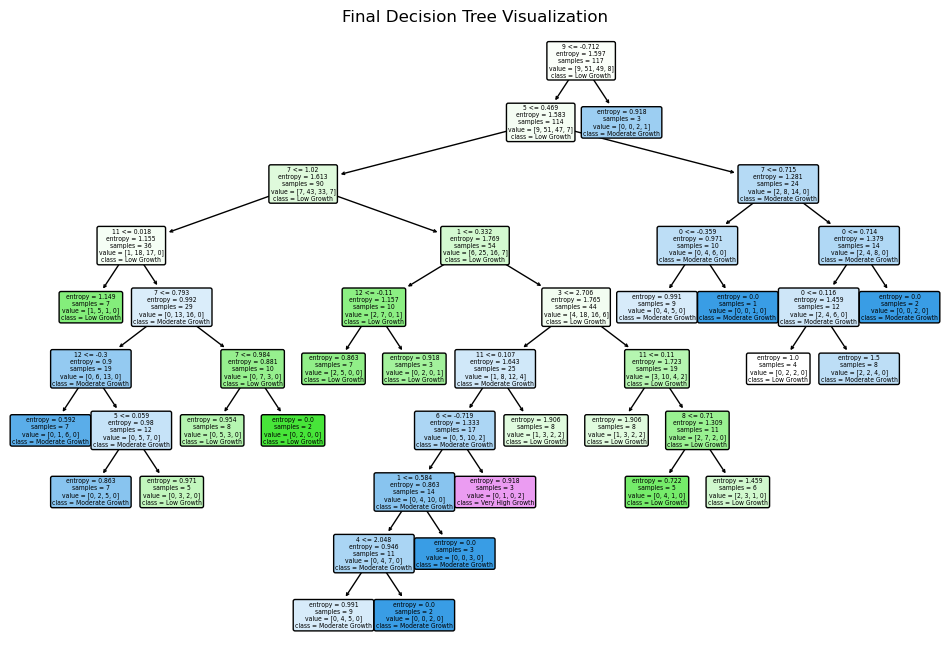

In [60]:
plt.figure(figsize=(12, 8))
plot_tree(final_dt_model, filled=True, feature_names=[str(i) for i in range(X.shape[1])], class_names=np.unique(Y).astype(str), rounded=True)
plt.title("Final Decision Tree Visualization")
plt.show()

In [61]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the training set using the final model
final_train_pred = final_dt_model.predict(X_train)

# Evaluate the performance of the final model on the training set
final_train_accuracy = accuracy_score(y_train, final_train_pred)
print(f"Final Decision Tree Accuracy on Training Set: {final_train_accuracy:.2f}")

# Print classification report for the final model on the training set
print("Classification Report for Final Decision Tree on Training Set:")
print(classification_report(y_train, final_train_pred))

# Make predictions on the validation set using the final model
final_val_pred = final_dt_model.predict(X_val)

# Evaluate the performance of the final model on the validation set
final_val_accuracy = accuracy_score(y_val, final_val_pred)
print(f"Final Decision Tree Accuracy on Validation Set: {final_val_accuracy:.2f}")

# Print classification report for the final model on the validation set
print("Classification Report for Final Decision Tree on Validation Set:")
print(classification_report(y_val, final_val_pred))

# Make predictions on the test set using the final model
final_test_pred = final_dt_model.predict(X_test)

# Evaluate the performance of the final model on the test set
final_test_accuracy = accuracy_score(y_test, final_test_pred)
print(f"Final Decision Tree Accuracy on Test Set: {final_test_accuracy:.2f}")

# Print classification report for the final model on the test set
print("Classification Report for Final Decision Tree on Test Set:")
print(classification_report(y_test, final_test_pred))

Final Decision Tree Accuracy on Training Set: 0.63
Classification Report for Final Decision Tree on Training Set:
                  precision    recall  f1-score   support

     High Growth       0.00      0.00      0.00         9
      Low Growth       0.59      0.73      0.65        51
 Moderate Growth       0.69      0.71      0.70        49
Very High Growth       0.67      0.25      0.36         8

        accuracy                           0.63       117
       macro avg       0.49      0.42      0.43       117
    weighted avg       0.59      0.63      0.60       117

Final Decision Tree Accuracy on Validation Set: 0.36
Classification Report for Final Decision Tree on Validation Set:
                  precision    recall  f1-score   support

     High Growth       0.00      0.00      0.00         4
      Low Growth       0.53      0.56      0.54        18
 Moderate Growth       0.21      0.36      0.27        11
Very High Growth       0.00      0.00      0.00         6

        a

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

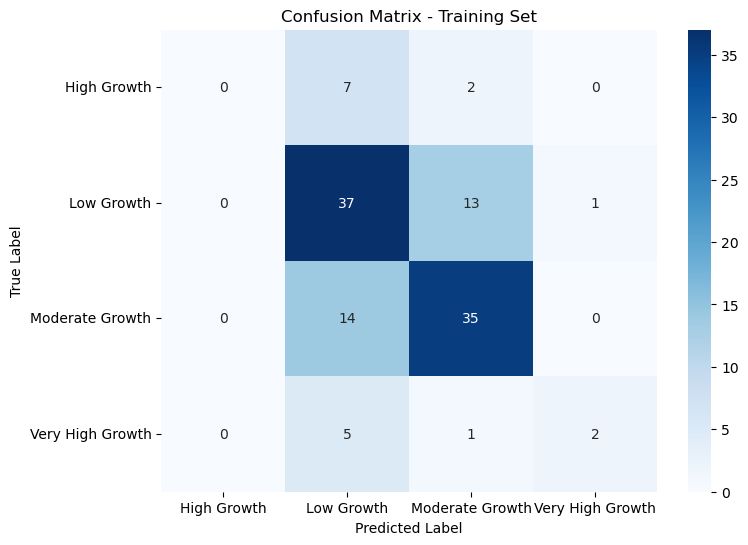

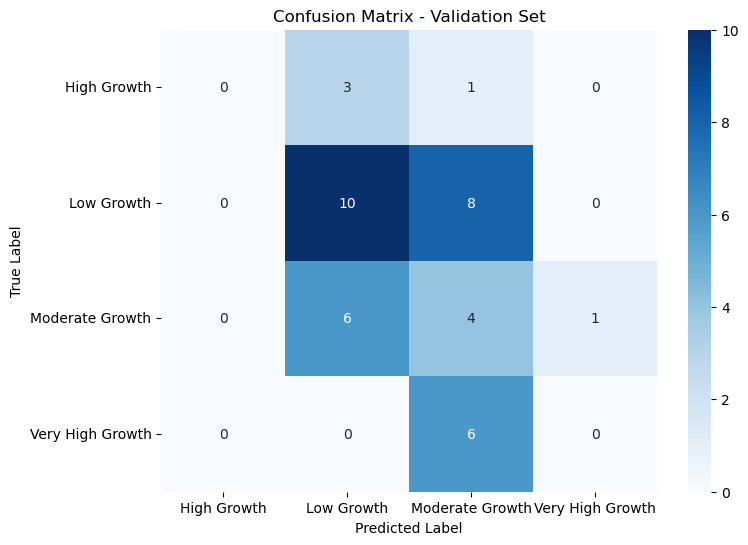

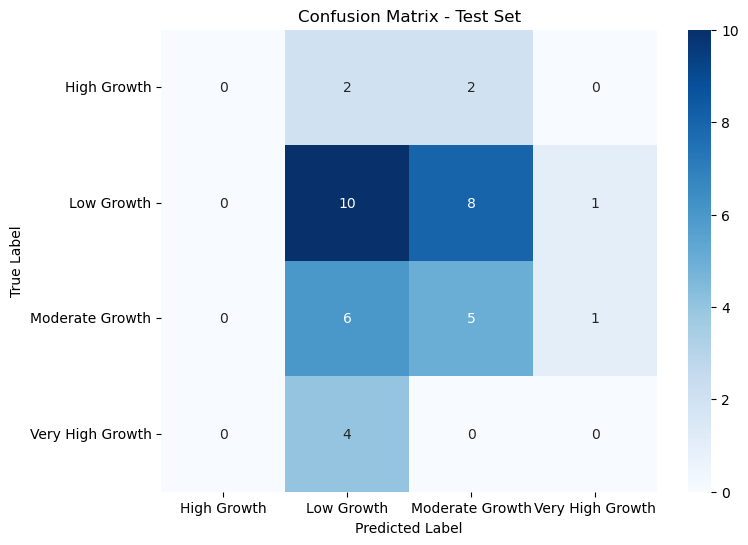

In [62]:
def plot_confusion_matrix(conf_matrix, classes, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrix for the final model on the training set
plot_confusion_matrix(final_train_conf_matrix, classes=np.unique(Y), title="Confusion Matrix - Training Set")

# Plot confusion matrix for the final model on the validation set
plot_confusion_matrix(final_val_conf_matrix, classes=np.unique(Y), title="Confusion Matrix - Validation Set")

# Plot confusion matrix for the final model on the test set
plot_confusion_matrix(final_test_conf_matrix, classes=np.unique(Y), title="Confusion Matrix - Test Set")

In [63]:
# Decision Tree Classifier : RandomisedSearchCV

In [64]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [65]:
randomized_search = RandomizedSearchCV(base_dt_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=1)

In [67]:
best_dt_model_randomized = randomized_search.best_estimator_
best_dt_model_randomized

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4,
                       min_samples_split=10, random_state=42,
                       splitter='random')

In [68]:
best_dt_model_ = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=20, min_samples_leaf=4, min_samples_split=10, random_state=42, splitter='random')

best_dt_model_.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4,
                       min_samples_split=10, random_state=42,
                       splitter='random')